## Group 2 - Modeling 
## Seth Galluzzi (vzw6yk), Max Jones (maj3js), Said Mrad (sm2yk)

## Data Gathering

In [1]:
import os
import pandas as pd

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [2]:
## Appends each year's defensive dataframe into a list
DF_list = [pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/defense/' + str(i) + '.csv') 
           for i in range(1966, 2020)] 

In [3]:
year = 1966

## Creates new identifying "year" column for each year's dataframe
for i in range(0,54):
    DF_list[i]['Year'] = year
    year += 1

In [4]:
## Merges each year's dataframe into one dataframe
df_all = pd.concat(DF_list)

In [5]:
## Removes unnecessary columns
df_all = df_all.drop(columns='Unnamed: 0')

In [6]:
## Write to github repo

#df_all.to_csv("df_all.csv")

## Create Variable For Prediction

In [7]:
df_all2 = df_all

In [8]:
df_all2 = df_all.sort_values(by=['Tm', 'Year'])

df_all2['Next_PPR_Allowed'] = 0

for i in range(0,1539):
    df_all2.iloc[i, df_all2.columns.get_loc('Next_PPR_Allowed')] = df_all2.iloc[i+1, df_all2.columns.get_loc('PPRFantasyPointsAllowed')]
    
df_all2['Next_PPRDefRank'] = 0

for i in range(0,1539):
    df_all2.iloc[i, df_all2.columns.get_loc('Next_PPRDefRank')] = df_all2.iloc[i+1, df_all2.columns.get_loc('PPRDefRank')]

## Only use data from 2002-2017 to avoid name changes and outdated trends.
### The 2018 data was excluded to use in validation phase.

In [9]:
df_all3 = df_all2[df_all2['Year'] >= 2002]

In [10]:
df_all3 = df_all3[df_all3['Year']<2018]

In [11]:
## Write to github repo
#df_all3.to_csv("df_all3.csv")

#df_all3 = pd.read_csv('df_all3.csv')

In [12]:
df_all3.head(5)

,Tm,PointsAllowed,TotalYardsAllowed,OffensivePlaysAllowed,YardsPerPlay,TO,ForcedFumbles,TotalFirstDownsAllowed,Cmp,PassingAttAllowed,...,PPRFantasyPointsAllowed,PPRDefRank,HalfPPRFantasyPointsAllowed,HalfPPRDefRank,StandardFantasyPointsAllowed,StandardDefRank,Year,EXP,Next_PPR_Allowed,Next_PPRDefRank
28,Arizona Cardinals,417.0,6020.0,1046.0,5.8,25.0,8.0,335.0,335.0,535.0,...,1433.96,28.0,1266.46,29.0,1098.96,29.0,2002,-93.81,1350.96,30.0
31,Arizona Cardinals,452.0,5504.0,993.0,5.5,23.0,10.0,326.0,311.0,497.0,...,1350.96,30.0,1195.46,30.0,1039.96,30.0,2003,-2.10,1098.54,8.0
11,Arizona Cardinals,322.0,5141.0,993.0,5.2,30.0,15.0,282.0,271.0,505.0,...,1098.54,8.0,963.04,10.0,827.54,12.0,2004,162.40,1147.78,15.0
25,Arizona Cardinals,387.0,4729.0,936.0,5.1,26.0,11.0,272.0,301.0,488.0,...,1147.78,15.0,997.28,15.0,846.78,15.0,2005,118.27,1267.86,25.0
28,Arizona Cardinals,389.0,5591.0,1018.0,5.5,33.0,17.0,331.0,321.0,522.0,...,1267.86,25.0,1107.36,25.0,946.86,24.0,2006,148.96,1317.94,25.0


In [13]:
df_all3.loc[df_all3['Next_PPR_Allowed'] == 0]
df_all3 = df_all3.drop(index=[26])

In [14]:
##########

In [15]:
df_all3.head(20)

,Tm,PointsAllowed,TotalYardsAllowed,OffensivePlaysAllowed,YardsPerPlay,TO,ForcedFumbles,TotalFirstDownsAllowed,Cmp,PassingAttAllowed,...,PPRFantasyPointsAllowed,PPRDefRank,HalfPPRFantasyPointsAllowed,HalfPPRDefRank,StandardFantasyPointsAllowed,StandardDefRank,Year,EXP,Next_PPR_Allowed,Next_PPRDefRank
28,Arizona Cardinals,417.0,6020.0,1046.0,5.8,25.0,8.0,335.0,335.0,535.0,...,1433.96,28.0,1266.46,29.0,1098.96,29.0,2002,-93.81,1350.96,30.0
31,Arizona Cardinals,452.0,5504.0,993.0,5.5,23.0,10.0,326.0,311.0,497.0,...,1350.96,30.0,1195.46,30.0,1039.96,30.0,2003,-2.10,1098.54,8.0
11,Arizona Cardinals,322.0,5141.0,993.0,5.2,30.0,15.0,282.0,271.0,505.0,...,1098.54,8.0,963.04,10.0,827.54,12.0,2004,162.40,1147.78,15.0
25,Arizona Cardinals,387.0,4729.0,936.0,5.1,26.0,11.0,272.0,301.0,488.0,...,1147.78,15.0,997.28,15.0,846.78,15.0,2005,118.27,1267.86,25.0
28,Arizona Cardinals,389.0,5591.0,1018.0,5.5,33.0,17.0,331.0,321.0,522.0,...,1267.86,25.0,1107.36,25.0,946.86,24.0,2006,148.96,1317.94,25.0
27,Arizona Cardinals,426.0,5304.0,993.0,5.3,30.0,17.0,312.0,323.0,517.0,...,1373.00,27.0,1211.50,28.0,1050.00,28.0,2008,67.05,1289.86,21.0
14,Arizona Cardinals,325.0,5543.0,1038.0,5.3,29.0,8.0,289.0,346.0,593.0,...,1289.86,21.0,1116.86,20.0,943.86,19.0,2009,87.97,1341.86,24.0
29,Arizona Cardinals,434.0,5977.0,1092.0,5.5,30.0,13.0,339.0,324.0,533.0,...,1341.86,24.0,1179.86,25.0,1017.86,25.0,2010,109.61,1278.04,15.0
16,Arizona Cardinals,348.0,5682.0,1095.0,5.2,19.0,9.0,333.0,340.0,578.0,...,1278.04,15.0,1108.04,14.0,938.04,13.0,2011,158.01,1145.02,5.0
16,Arizona Cardinals,357.0,5405.0,1041.0,5.2,33.0,11.0,288.0,270.0,497.0,...,1145.02,5.0,1010.02,7.0,875.02,7.0,2012,169.34,1284.02,13.0


In [16]:
df_all3 = df_all3.reset_index()

In [17]:
df_all3.loc[df_all3['Tm']=="Arizona Cardinals"].head(10)

,index,Tm,PointsAllowed,TotalYardsAllowed,OffensivePlaysAllowed,YardsPerPlay,TO,ForcedFumbles,TotalFirstDownsAllowed,Cmp,...,PPRFantasyPointsAllowed,PPRDefRank,HalfPPRFantasyPointsAllowed,HalfPPRDefRank,StandardFantasyPointsAllowed,StandardDefRank,Year,EXP,Next_PPR_Allowed,Next_PPRDefRank
0,28,Arizona Cardinals,417.0,6020.0,1046.0,5.8,25.0,8.0,335.0,335.0,...,1433.96,28.0,1266.46,29.0,1098.96,29.0,2002,-93.81,1350.96,30.0
1,31,Arizona Cardinals,452.0,5504.0,993.0,5.5,23.0,10.0,326.0,311.0,...,1350.96,30.0,1195.46,30.0,1039.96,30.0,2003,-2.10,1098.54,8.0
2,11,Arizona Cardinals,322.0,5141.0,993.0,5.2,30.0,15.0,282.0,271.0,...,1098.54,8.0,963.04,10.0,827.54,12.0,2004,162.40,1147.78,15.0
3,25,Arizona Cardinals,387.0,4729.0,936.0,5.1,26.0,11.0,272.0,301.0,...,1147.78,15.0,997.28,15.0,846.78,15.0,2005,118.27,1267.86,25.0
4,28,Arizona Cardinals,389.0,5591.0,1018.0,5.5,33.0,17.0,331.0,321.0,...,1267.86,25.0,1107.36,25.0,946.86,24.0,2006,148.96,1317.94,25.0
5,27,Arizona Cardinals,426.0,5304.0,993.0,5.3,30.0,17.0,312.0,323.0,...,1373.00,27.0,1211.50,28.0,1050.00,28.0,2008,67.05,1289.86,21.0
6,14,Arizona Cardinals,325.0,5543.0,1038.0,5.3,29.0,8.0,289.0,346.0,...,1289.86,21.0,1116.86,20.0,943.86,19.0,2009,87.97,1341.86,24.0
7,29,Arizona Cardinals,434.0,5977.0,1092.0,5.5,30.0,13.0,339.0,324.0,...,1341.86,24.0,1179.86,25.0,1017.86,25.0,2010,109.61,1278.04,15.0
8,16,Arizona Cardinals,348.0,5682.0,1095.0,5.2,19.0,9.0,333.0,340.0,...,1278.04,15.0,1108.04,14.0,938.04,13.0,2011,158.01,1145.02,5.0
9,16,Arizona Cardinals,357.0,5405.0,1041.0,5.2,33.0,11.0,288.0,270.0,...,1145.02,5.0,1010.02,7.0,875.02,7.0,2012,169.34,1284.02,13.0


In [18]:
df_all3.describe()

,index,PointsAllowed,TotalYardsAllowed,OffensivePlaysAllowed,YardsPerPlay,TO,ForcedFumbles,TotalFirstDownsAllowed,Cmp,PassingAttAllowed,...,PPRFantasyPointsAllowed,PPRDefRank,HalfPPRFantasyPointsAllowed,HalfPPRDefRank,StandardFantasyPointsAllowed,StandardDefRank,Year,EXP,Next_PPR_Allowed,Next_PPRDefRank
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,...,496.000000,496.000000,496.000000,496.00000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,15.161290,348.931452,5350.602823,1013.066532,5.280040,26.104839,10.683468,305.913306,328.667339,539.852823,...,1256.888508,16.203629,1092.554839,16.18750,928.221169,16.181452,2009.500000,74.525927,1268.520000,16.536290
std,9.192344,57.305907,511.374703,44.026640,0.415343,6.447386,3.543469,28.569365,35.679610,44.937583,...,142.607045,9.208739,131.642641,9.19657,122.308290,9.191747,4.614426,90.502697,145.876313,9.313328
min,0.000000,196.000000,3795.000000,882.000000,3.900000,11.000000,2.000000,228.000000,239.000000,409.000000,...,835.000000,1.000000,705.500000,1.00000,576.000000,1.000000,2002.000000,-180.120000,845.060000,1.000000
25%,7.000000,309.750000,5005.000000,980.750000,5.000000,22.000000,8.000000,286.000000,303.000000,511.000000,...,1159.990000,8.000000,1002.015000,8.00000,844.500000,8.000000,2005.750000,13.457500,1169.345000,8.000000
50%,15.000000,346.000000,5355.500000,1010.000000,5.300000,26.000000,11.000000,307.000000,329.000000,538.000000,...,1255.430000,16.000000,1095.300000,16.00000,928.840000,16.000000,2009.500000,78.160000,1273.760000,17.000000
75%,23.000000,388.000000,5697.500000,1041.250000,5.525000,30.000000,13.000000,325.000000,351.000000,569.000000,...,1353.405000,24.000000,1181.765000,24.00000,1012.375000,24.000000,2013.250000,132.567500,1368.215000,25.000000
max,31.000000,517.000000,7042.000000,1150.000000,6.600000,48.000000,23.000000,388.000000,425.000000,670.000000,...,1693.260000,32.000000,1507.260000,32.00000,1321.260000,32.000000,2017.000000,339.230000,1693.260000,32.000000


In [19]:
feats = ["PointsAllowed", 
         "TotalYardsAllowed", 
         "OffensivePlaysAllowed", 
         "YardsPerPlay", 
         "TO",
         "ForcedFumbles",
         "TotalFirstDownsAllowed",
         "Cmp",
         "PassingAttAllowed",
         "PassingTDAllowed",
        "PPRFantasyPointsAllowed"]

variables= ['Tm',
           'Year',
            "PPRFantasyPointsAllowed",
           "PPRDefRank",
            "PointsAllowed", 
            "TotalYardsAllowed", 
            "OffensivePlaysAllowed", 
            "YardsPerPlay", 
            "TO",
            "ForcedFumbles",
            "TotalFirstDownsAllowed",
            "Cmp",
            "PassingAttAllowed",
            "PassingTDAllowed",
           "Next_PPR_Allowed",
           "Next_PPRDefRank"]

### Create 2018 Validation Set

In [20]:
###### Validation on 2019 Season

df19 = df_all2.loc[df_all2['Year']==2018]

spark_df = spark.createDataFrame(df19)

df19 = spark_df[variables]
############

In [21]:
spark_df = spark.createDataFrame(df_all3)

df = spark_df[variables]

In [22]:
df.sort('PPRDefRank','PPRFantasyPointsAllowed').show(10)

+--------------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+------------------+---------------+
|                  Tm|Year|PPRFantasyPointsAllowed|PPRDefRank|PointsAllowed|TotalYardsAllowed|OffensivePlaysAllowed|YardsPerPlay|  TO|ForcedFumbles|TotalFirstDownsAllowed|  Cmp|PassingAttAllowed|PassingTDAllowed|  Next_PPR_Allowed|Next_PPRDefRank|
+--------------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+------------------+---------------+
|Tampa Bay Buccaneers|2002|                  835.0|       1.0|        196.0|           4044.0|                963.0|         4.2|38.0|          7.0|                 236.0|259.0|            510.0|            10.0|             959.0|            2.0|
|       

### Assembling and Standardizing Features

In [23]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

In [24]:
assembler = VectorAssembler(inputCols=feats,
                            outputCol="features")

tr = assembler.transform(df)
tr.select("*").show(1, truncate=False)

+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+-----------------------------------------------------------------+
|Tm               |Year|PPRFantasyPointsAllowed|PPRDefRank|PointsAllowed|TotalYardsAllowed|OffensivePlaysAllowed|YardsPerPlay|TO  |ForcedFumbles|TotalFirstDownsAllowed|Cmp  |PassingAttAllowed|PassingTDAllowed|Next_PPR_Allowed|Next_PPRDefRank|features                                                         |
+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+-----------------------------------------------------------------+
|Arizona Cardinals|2002|1433.96                |28.0      |417.0        |

In [25]:
# Initialize the `standardScaler`
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

# Fit the DataFrame to the scaler; this computes the mean, standard deviation of each feature
scalerModel = scaler.fit(tr)

# Transform the data in `df2` with the scaler
df2 = scalerModel.transform(tr)

In [26]:
df2.show(2)

+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+--------------------+--------------------+
|               Tm|Year|PPRFantasyPointsAllowed|PPRDefRank|PointsAllowed|TotalYardsAllowed|OffensivePlaysAllowed|YardsPerPlay|  TO|ForcedFumbles|TotalFirstDownsAllowed|  Cmp|PassingAttAllowed|PassingTDAllowed|Next_PPR_Allowed|Next_PPRDefRank|            features|      scaledFeatures|
+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+--------------------+--------------------+
|Arizona Cardinals|2002|                1433.96|      28.0|        417.0|           6020.0|               1046.0|         5.8|25.0|          8.0|

### Set Seed and 80-20 Train Test Split

In [27]:
seed = 314
train_test = [0.8, 0.2]
train_data, test_data = df2.randomSplit(train_test, seed)

### Linear Regression Model

In [28]:
from pyspark.ml.regression import LinearRegression # note this is from the ML package

maxIter=10
regParam=0.3
elasticNetParam=0.8

lr = LinearRegression(featuresCol='scaledFeatures',         # feature vector name
                      labelCol='Next_PPR_Allowed',  # target variable name
                      maxIter=maxIter,
                      regParam=regParam, 
                      elasticNetParam=elasticNetParam)

In [29]:
lrModel = lr.fit(train_data)

In [30]:
lrPred = lrModel.transform(test_data)

In [31]:
from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPR_Allowed")
mse1 = ev.evaluate(lrPred, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

Mean Squared Error: 14099.128913267643


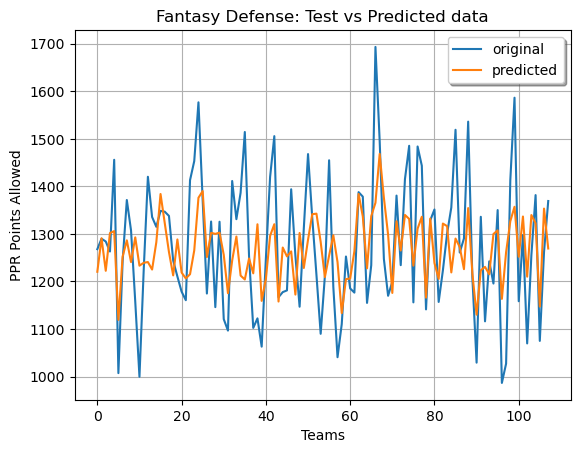

In [32]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt


x_ax = range(0, lrPred.count())
y_pred=lrPred.select("prediction").collect()
y_orig=lrPred.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### Results of Linear Regression on 2018 Validation Set

+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+-----------------------------------------------------------------+
|Tm               |Year|PPRFantasyPointsAllowed|PPRDefRank|PointsAllowed|TotalYardsAllowed|OffensivePlaysAllowed|YardsPerPlay|TO  |ForcedFumbles|TotalFirstDownsAllowed|Cmp  |PassingAttAllowed|PassingTDAllowed|Next_PPR_Allowed|Next_PPRDefRank|features                                                         |
+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+-----------------------------------------------------------------+
|Arizona Cardinals|2018|1374.58                |16.0      |425.0        |

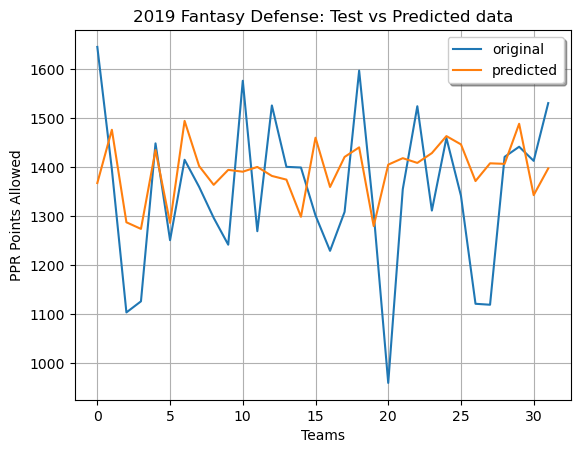

+--------------------+------------------+----------------+
|                  Tm|        prediction|Next_PPR_Allowed|
+--------------------+------------------+----------------+
|       Buffalo Bills|1273.7263285390095|         1126.12|
|   Minnesota Vikings|1279.4464474012898|         1305.98|
|       Chicago Bears|1285.9783073681133|         1250.76|
|    Baltimore Ravens|1287.2040012554835|          1103.5|
|Jacksonville Jaguars|1298.4516220609794|         1398.82|
|    Tennessee Titans|1342.5345038198238|          1412.4|
|Los Angeles Chargers| 1359.168494342848|         1229.06|
|      Dallas Cowboys|1363.5365155479576|         1296.24|
|   Arizona Cardinals|1367.1797977746824|          1644.6|
| Pittsburgh Steelers|1371.2277962152425|         1121.12|
|  Indianapolis Colts|1374.1500155708454|         1400.18|
|      Houston Texans|1381.6833001977266|         1525.34|
|       Detroit Lions|1390.2948364095391|         1575.64|
|      Denver Broncos|1394.0251578071359|         1241.5

In [33]:
assembler = VectorAssembler(inputCols=feats,
                            outputCol="features")

tr19 = assembler.transform(df19)
tr19.select("*").show(1, truncate=False)

# Initialize the `standardScaler`
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

# Fit the DataFrame to the scaler; this computes the mean, standard deviation of each feature
scalerModel19 = scaler.fit(tr19)

# Transform the data in `df2` with the scaler
df19 = scalerModel19.transform(tr19)

lrPred19 = lrModel.transform(df19)

from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPR_Allowed")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt


x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction','Next_PPR_Allowed').show(32)

### Logistic Regression Model with PPRDefRank

In [34]:
#### Second Model Attempt: Multinomial Logistic Regression with PPRDefRank

Mean Squared Error: 130.17592592592592


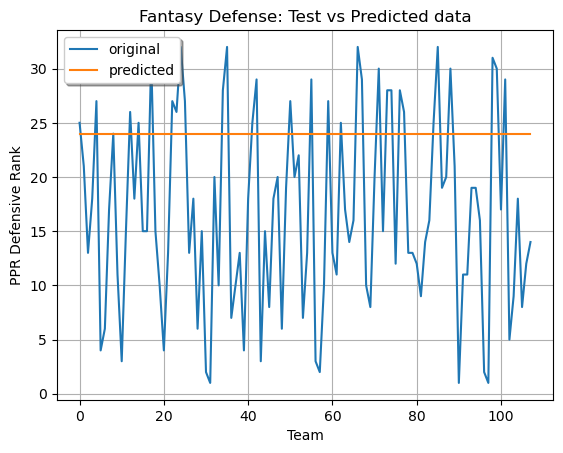

In [35]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol='scaledFeatures',         # feature vector name
                      labelCol='Next_PPRDefRank',  # target variable name
                      maxIter=maxIter,
                      regParam=regParam, 
                      elasticNetParam=elasticNetParam)

lrModel = lr.fit(train_data)

lrPred = lrModel.transform(test_data)

from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPRDefRank")
mse1 = ev.evaluate(lrPred, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

x_ax = range(0, lrPred.count())
y_pred=lrPred.select("prediction").collect()
y_orig=lrPred.select("Next_PPRDefRank").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense: Test vs Predicted data")
plt.xlabel('Team')
plt.ylabel('PPR Defensive Rank')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### Results of Logistic Regression on 2018 Validation Set

Mean Squared Error: 141.5


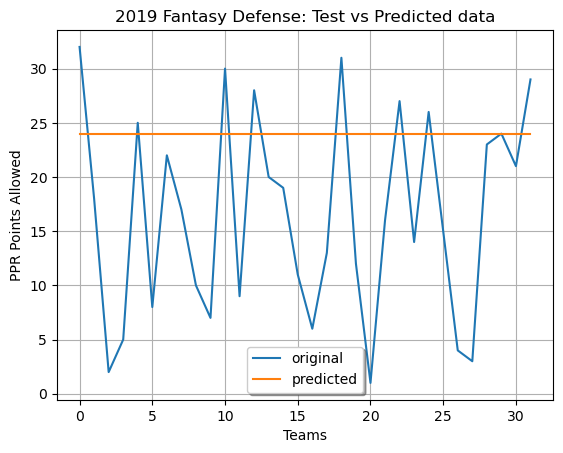

+--------------------+----------+---------------+
|                  Tm|prediction|Next_PPRDefRank|
+--------------------+----------+---------------+
|   Arizona Cardinals|      24.0|           32.0|
|     Atlanta Falcons|      24.0|           18.0|
|    Baltimore Ravens|      24.0|            2.0|
|       Buffalo Bills|      24.0|            5.0|
|   Carolina Panthers|      24.0|           25.0|
|       Chicago Bears|      24.0|            8.0|
|  Cincinnati Bengals|      24.0|           22.0|
|    Cleveland Browns|      24.0|           17.0|
|      Dallas Cowboys|      24.0|           10.0|
|      Denver Broncos|      24.0|            7.0|
|       Detroit Lions|      24.0|           30.0|
|   Green Bay Packers|      24.0|            9.0|
|      Houston Texans|      24.0|           28.0|
|  Indianapolis Colts|      24.0|           20.0|
|Jacksonville Jaguars|      24.0|           19.0|
|  Kansas City Chiefs|      24.0|           11.0|
|Los Angeles Chargers|      24.0|            6.0|


In [36]:
lrPred19 = lrModel.transform(df19)

from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPRDefRank")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt


x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("Next_PPRDefRank").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction','Next_PPRDefRank').show(32)

### Linear Regression with Params and CrossVal With PPRFantasyPointsAllowed

In [37]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

CrossValidatorModel_4f27df1a5d26
MSE: 14212.31268020049


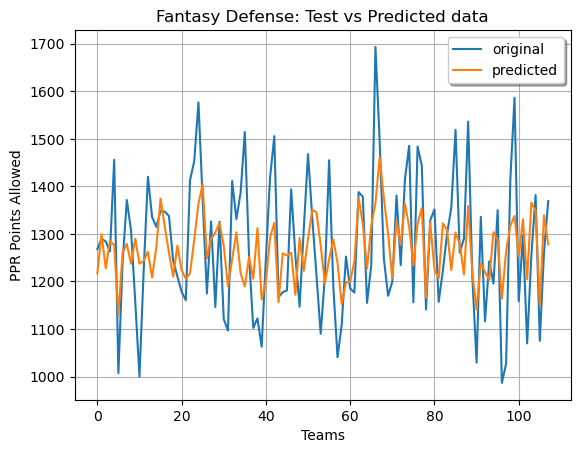

In [38]:
# Create initial LinearRegression model
lr = LinearRegression(labelCol="Next_PPR_Allowed", featuresCol="scaledFeatures")


# Create ParamGrid for Cross Validation
lrparamGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.001, 0.01, 0.1, 0.5, 1.0, 2.0])
             #  .addGrid(lr.regParam, [0.01, 0.1, 0.5])
             #  .addGrid(lr.regParam, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
             .addGrid(lr.elasticNetParam, [0.0, 0.25, 0.5, 0.75, 1.0])
             #  .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10, 20, 50])
             #  .addGrid(lr.maxIter, [1, 5, 10])
             .build())

# Evaluate model
lrevaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPR_Allowed", metricName="mse")

# Create 5-fold CrossValidator
lrcv = CrossValidator(estimator = lr,
                    estimatorParamMaps = lrparamGrid,
                    evaluator = lrevaluator,
                    numFolds = 5)

# Run cross validations
lrcvModel = lrcv.fit(train_data)
print(lrcvModel)

# Get Model Summary Statistics
#lrcvSummary = lrcvModel.bestModel.summary
#print("Coefficient Standard Errors: " + str(lrcvSummary.coefficientStandardErrors))
#print("P Values: " + str(lrcvSummary.pValues)) # Last element is the intercept

# Use test set here so we can measure the accuracy of our model on new data
lrpredictions = lrcvModel.transform(test_data)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print('MSE:', lrevaluator.evaluate(lrpredictions))


x_ax = range(0, lrpredictions.count())
y_pred=lrpredictions.select("prediction").collect()
y_orig=lrpredictions.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### Results of Tuned Linear Regression on 2018 Validation Set

Mean Squared Error: 22242.068220438872


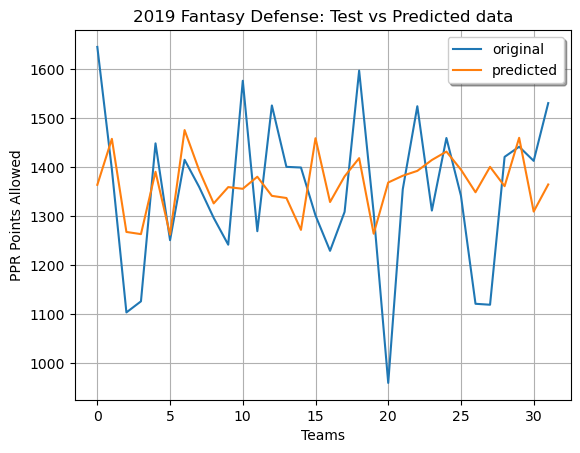

+--------------------+------------------+----------------+
|                  Tm|        prediction|Next_PPR_Allowed|
+--------------------+------------------+----------------+
|       Chicago Bears|1261.9378367842437|         1250.76|
|       Buffalo Bills|1263.0808355683207|         1126.12|
|   Minnesota Vikings| 1263.903532467761|         1305.98|
|    Baltimore Ravens|1267.5229713199346|          1103.5|
|Jacksonville Jaguars|1271.7462601050097|         1398.82|
|    Tennessee Titans| 1309.091185699999|          1412.4|
|      Dallas Cowboys|1325.7203514925436|         1296.24|
|Los Angeles Chargers|1328.5400061158734|         1229.06|
|  Indianapolis Colts|1336.6913016773233|         1400.18|
|      Houston Texans|1341.0722042098605|         1525.34|
| Pittsburgh Steelers|1348.4045493979925|         1121.12|
|       Detroit Lions| 1355.481078150146|         1575.64|
|      Denver Broncos|1358.9162712484335|         1241.56|
|    Seattle Seahawks|1360.7751652707136|         1420.5

In [39]:
lrPred19 = lrcvModel.transform(df19)

from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPR_Allowed")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt


x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction','Next_PPR_Allowed').show(32)

### Random Forest Classifier with PPRDefRank

In [40]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

+-----------------+---------------+----------+
|               Tm|Next_PPRDefRank|prediction|
+-----------------+---------------+----------+
|Arizona Cardinals|           25.0|      10.0|
|Arizona Cardinals|           21.0|      29.0|
|Arizona Cardinals|           13.0|       9.0|
|  Atlanta Falcons|           18.0|      23.0|
|  Atlanta Falcons|           27.0|      15.0|
+-----------------+---------------+----------+
only showing top 5 rows



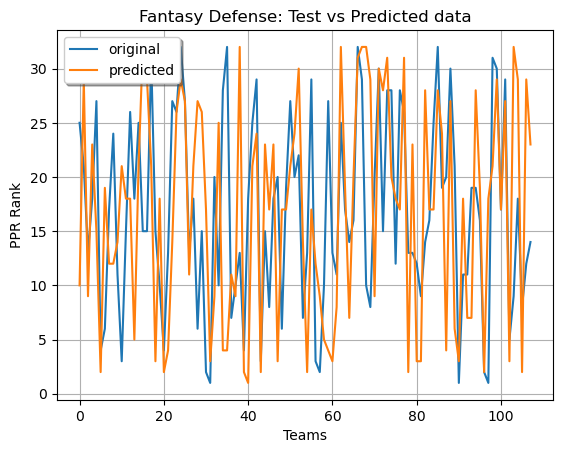

In [41]:

# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="PPRDefRank", featuresCol="scaledFeatures", numTrees=10)

# Chain indexers and forest in a Pipeline
pipeline = Pipeline(stages=[rf])

# Train model.  This also runs the indexers.
model = pipeline.fit(train_data)

# Make predictions.
predictions = model.transform(test_data)

# Select example rows to display.
predictions.select('Tm', "Next_PPRDefRank", "prediction").show(5)

# Select (prediction, true label) and compute test error
#evaluator = MulticlassClassificationEvaluator(labelCol="Next_PPRDefRank", predictionCol="prediction", metricName="accuracy")
#acc = evaluator.evaluate(predictions)
#print("Test Error =" % acc)

x_ax = range(0, predictions.count())
y_pred=predictions.select("prediction").collect()
y_orig=predictions.select("Next_PPRDefRank").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Rank')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [42]:

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPRDefRank")
mse1 = ev.evaluate(predictions, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

Mean Squared Error: 110.90740740740739


### Results of Random Forest Classifier on 2018 Validation Set

Mean Squared Error: 198.46875


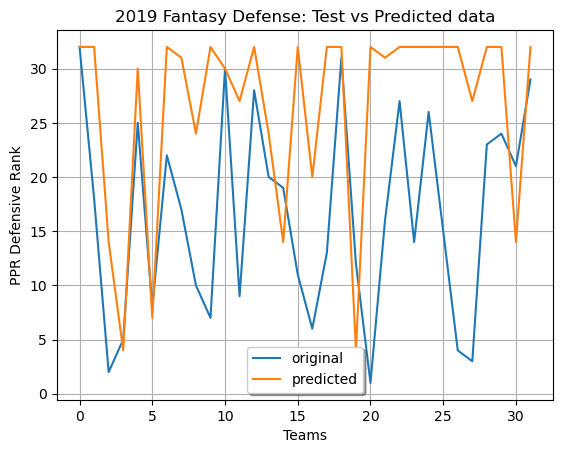

+--------------------+----------+---------------+
|                  Tm|prediction|Next_PPRDefRank|
+--------------------+----------+---------------+
|       Buffalo Bills|       4.0|            5.0|
|   Minnesota Vikings|       4.0|           12.0|
|       Chicago Bears|       7.0|            8.0|
|Jacksonville Jaguars|      14.0|           19.0|
|    Baltimore Ravens|      14.0|            2.0|
|    Tennessee Titans|      14.0|           21.0|
|Los Angeles Chargers|      20.0|            6.0|
|      Dallas Cowboys|      24.0|           10.0|
|  Indianapolis Colts|      24.0|           20.0|
| San Francisco 49ers|      27.0|            3.0|
|   Green Bay Packers|      27.0|            9.0|
|   Carolina Panthers|      30.0|           25.0|
|       Detroit Lions|      30.0|           30.0|
|  New Orleans Saints|      31.0|           16.0|
|    Cleveland Browns|      31.0|           17.0|
|   Arizona Cardinals|      32.0|           32.0|
|     Atlanta Falcons|      32.0|           18.0|


In [43]:
lrPred19 = model.transform(df19)

from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPRDefRank")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt


x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("Next_PPRDefRank").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Defensive Rank')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction','Next_PPRDefRank').show(32)

### Random Forest Regression - Next_PPR_Allowed

In [44]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

+-----------------+----------------+------------------+--------------------+
|               Tm|Next_PPR_Allowed|        prediction|      scaledFeatures|
+-----------------+----------------+------------------+--------------------+
|Arizona Cardinals|         1267.86|1168.8481111496671|[6.753230485155,9...|
|Arizona Cardinals|         1289.86|1249.4165558193959|[7.43378859606209...|
|Arizona Cardinals|         1284.02|1238.9171741620971|[6.22972424599569...|
|  Atlanta Falcons|          1262.9|1284.0106761576708|[5.67131759089244...|
|  Atlanta Falcons|         1455.88|1277.3786157227767|[5.21761218362104...|
+-----------------+----------------+------------------+--------------------+
only showing top 5 rows

MSE = 16126.4


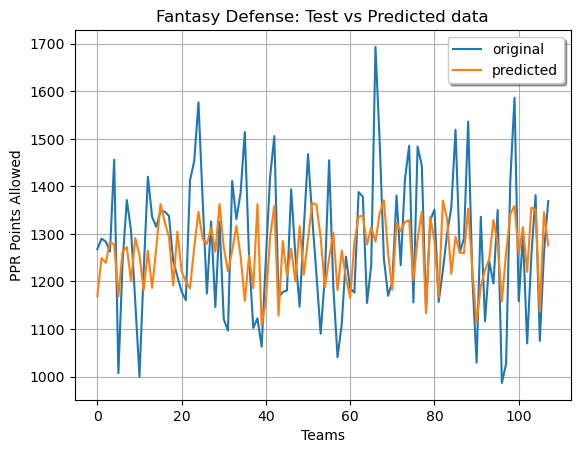

In [45]:
# Train a RandomForest model.
rf = RandomForestRegressor(labelCol="Next_PPR_Allowed", featuresCol="scaledFeatures")

# Chain indexer and forest in a Pipeline
pipeline = Pipeline(stages=[rf])

# Train model.  This also runs the indexer.
model = pipeline.fit(train_data)

# Make predictions.
predictions = model.transform(test_data)

# Select example rows to display.
predictions.select("Tm", "Next_PPR_Allowed","prediction", "scaledFeatures").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="Next_PPR_Allowed", predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(predictions)
print("MSE = %g" % mse)


x_ax = range(0, predictions.count())
y_pred=predictions.select("prediction").collect()
y_orig=predictions.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### Results of Random Forest Regression on 2018 Validation Set

Mean Squared Error: 23957.87063841547


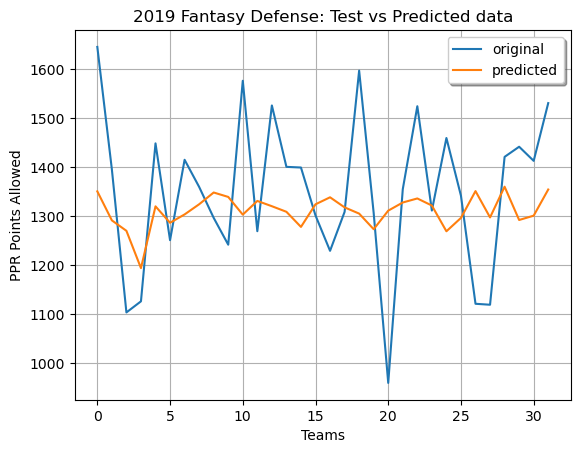

+--------------------+------------------+----------------+
|                  Tm|        prediction|Next_PPR_Allowed|
+--------------------+------------------+----------------+
|       Buffalo Bills|1193.8167119954558|         1126.12|
|     Oakland Raiders|1268.8775564649952|         1458.98|
|    Baltimore Ravens| 1269.836482556392|          1103.5|
|   Minnesota Vikings| 1273.085619535355|         1305.98|
|Jacksonville Jaguars|1277.7846605109557|         1398.82|
|       Chicago Bears|1286.2282092051526|         1250.76|
|     Atlanta Falcons|1291.1148093608606|         1395.02|
|Tampa Bay Buccaneers|1291.8929307736312|         1441.18|
| Philadelphia Eagles|1296.1394177105021|          1341.3|
| San Francisco 49ers|1297.1217626126613|         1119.18|
|    Tennessee Titans| 1300.718262985331|          1412.4|
|       Detroit Lions| 1302.796449771847|         1575.64|
|  Cincinnati Bengals|  1303.21846462906|         1414.58|
|      Miami Dolphins|1304.9081579702292|         1596.3

In [46]:
lrPred19 = model.transform(df19)

from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPR_Allowed")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt


x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction','Next_PPR_Allowed').show(32)

### Random Forest Regressor with paramgrid and crossval

CrossValidatorModel_9db179cd5a77
MSE: 16126.380272059734


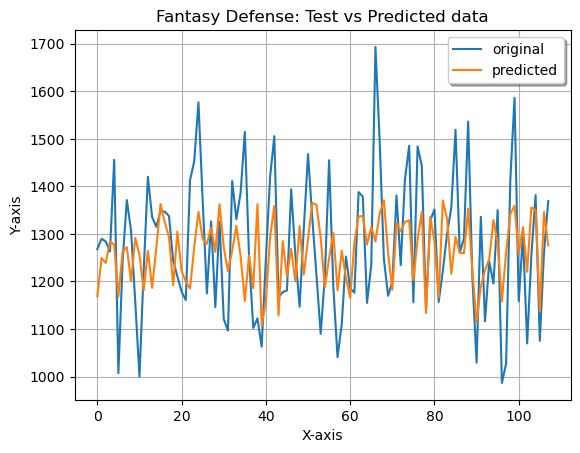

In [47]:
# Create initial LinearRegression model
rf = RandomForestRegressor(labelCol="Next_PPR_Allowed", featuresCol="scaledFeatures")


# Create ParamGrid for Cross Validation
lrparamGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.001, 0.01, 0.1, 0.5, 1.0, 2.0])
             #  .addGrid(lr.regParam, [0.01, 0.1, 0.5])
             .addGrid(lr.elasticNetParam, [0.0, 0.25, 0.5, 0.75, 1.0])
             #  .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10, 20, 50])
             #  .addGrid(lr.maxIter, [1, 5, 10])
             .build())

# Evaluate model
lrevaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPR_Allowed", metricName="mse")

# Create 5-fold CrossValidator
lrcv = CrossValidator(estimator = rf,
                    estimatorParamMaps = lrparamGrid,
                    evaluator = lrevaluator,
                    numFolds = 5)

# Run cross validations
lrcvModel = lrcv.fit(train_data)
print(lrcvModel)



# Use test set here so we can measure the accuracy of our model on new data
lrpredictions = lrcvModel.transform(test_data)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print('MSE:', lrevaluator.evaluate(lrpredictions))


x_ax = range(0, lrpredictions.count())
y_pred=lrpredictions.select("prediction").collect()
y_orig=lrpredictions.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense: Test vs Predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### Results of Random Forest Regression on 2018 Validation Set

Mean Squared Error: 23957.87063841547


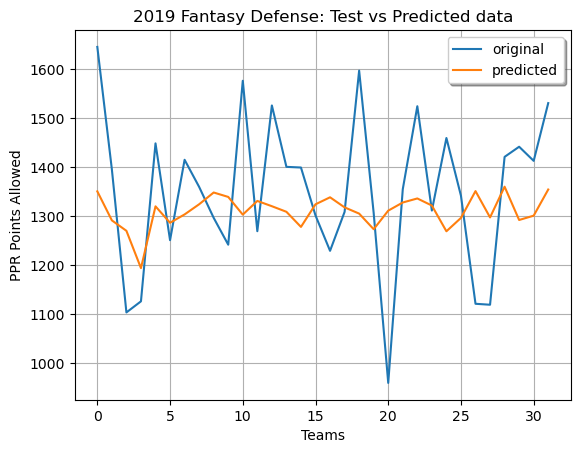

+--------------------+------------------+----------------+
|                  Tm|        prediction|Next_PPR_Allowed|
+--------------------+------------------+----------------+
|       Buffalo Bills|1193.8167119954558|         1126.12|
|     Oakland Raiders|1268.8775564649952|         1458.98|
|    Baltimore Ravens| 1269.836482556392|          1103.5|
|   Minnesota Vikings| 1273.085619535355|         1305.98|
|Jacksonville Jaguars|1277.7846605109557|         1398.82|
|       Chicago Bears|1286.2282092051526|         1250.76|
|     Atlanta Falcons|1291.1148093608606|         1395.02|
|Tampa Bay Buccaneers|1291.8929307736312|         1441.18|
| Philadelphia Eagles|1296.1394177105021|          1341.3|
| San Francisco 49ers|1297.1217626126613|         1119.18|
|    Tennessee Titans| 1300.718262985331|          1412.4|
|       Detroit Lions| 1302.796449771847|         1575.64|
|  Cincinnati Bengals|  1303.21846462906|         1414.58|
|      Miami Dolphins|1304.9081579702292|         1596.3

In [48]:
lrPred19 = lrcvModel.transform(df19)

from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPR_Allowed")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt


x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction','Next_PPR_Allowed').show(32)

### Gradient Boosting Regression

In [49]:
##### GBOOST Regression

MSE:  20791.91856028665


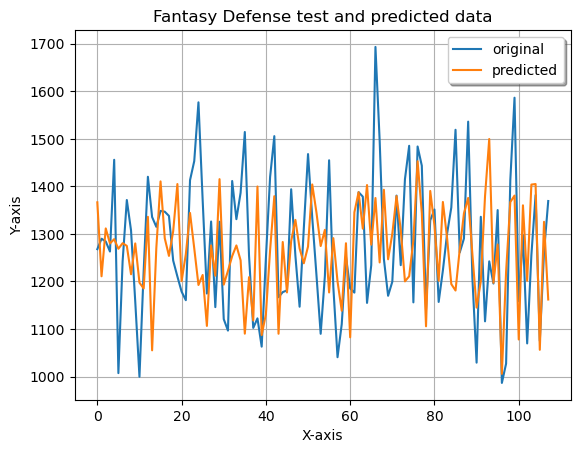

In [50]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.regression import GBTRegressor
import matplotlib.pyplot as plt


gbtr = GBTRegressor(featuresCol='scaledFeatures', labelCol='Next_PPR_Allowed', maxIter=10)
gbtr = gbtr.fit(train_data)

mdata = gbtr.transform(test_data)


mse=RegressionEvaluator(labelCol="Next_PPR_Allowed", predictionCol="prediction", metricName="mse")
mse=mse.evaluate(mdata)

print("MSE: ", mse)


x_ax = range(0, mdata.count())
y_pred=mdata.select("prediction").collect()
y_orig=mdata.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### Results of Gradient Boosting Regression on 2018 Validation Set

Mean Squared Error: 34072.73591078701


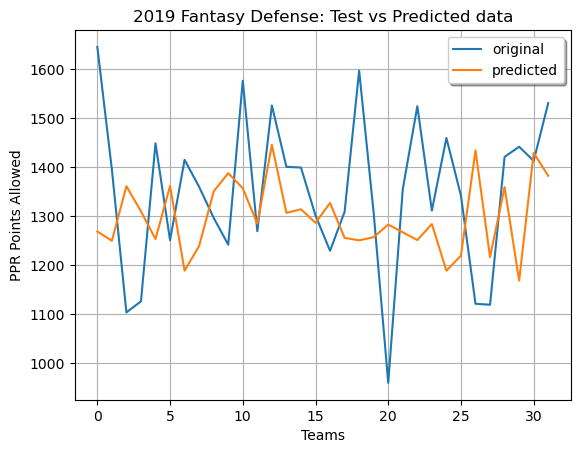

+--------------------+------------------+----------------+
|                  Tm|        prediction|Next_PPR_Allowed|
+--------------------+------------------+----------------+
|Tampa Bay Buccaneers|1168.2685817889599|         1441.18|
|     Oakland Raiders| 1188.560254988915|         1458.98|
|  Cincinnati Bengals|1188.5760996221054|         1414.58|
| San Francisco 49ers|1216.2103290513876|         1119.18|
| Philadelphia Eagles|1219.2888152098087|          1341.3|
|    Cleveland Browns|1239.0269284478306|          1359.3|
|     Atlanta Falcons|1249.5534643060919|         1395.02|
|      Miami Dolphins|  1250.37017793685|         1596.32|
|     New York Giants|1251.0706628041646|          1523.7|
|   Carolina Panthers| 1253.045631395021|         1448.04|
|    Los Angeles Rams|1255.4528905220805|          1308.4|
|   Minnesota Vikings|1256.9175863050386|         1305.98|
|  New Orleans Saints|1266.8138418646608|         1354.62|
|   Arizona Cardinals| 1268.494676436702|          1644.

In [51]:
lrPred19 = gbtr.transform(df19)

ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPR_Allowed")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("Next_PPR_Allowed").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction','Next_PPR_Allowed').show(32)

### Hybrid Model: Multinomial Logistic Regression with PPRDefRank Splits

In [52]:
#################### Hybrid Model: Multinomial Logistic Regression with PPRDefRank Splits

In [53]:
df2.show(2)

+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+--------------------+--------------------+
|               Tm|Year|PPRFantasyPointsAllowed|PPRDefRank|PointsAllowed|TotalYardsAllowed|OffensivePlaysAllowed|YardsPerPlay|  TO|ForcedFumbles|TotalFirstDownsAllowed|  Cmp|PassingAttAllowed|PassingTDAllowed|Next_PPR_Allowed|Next_PPRDefRank|            features|      scaledFeatures|
+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+--------------------+--------------------+
|Arizona Cardinals|2002|                1433.96|      28.0|        417.0|           6020.0|               1046.0|         5.8|25.0|          8.0|

In [54]:
dfsplit = df2

In [55]:
from pyspark.sql import functions as F

In [56]:
dfsplit = dfsplit.withColumn(
    "PPRDefRankSplits", 
     F.col("PPRDefRank"))

In [57]:
dfsplit.show(2)

+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+--------------------+--------------------+----------------+
|               Tm|Year|PPRFantasyPointsAllowed|PPRDefRank|PointsAllowed|TotalYardsAllowed|OffensivePlaysAllowed|YardsPerPlay|  TO|ForcedFumbles|TotalFirstDownsAllowed|  Cmp|PassingAttAllowed|PassingTDAllowed|Next_PPR_Allowed|Next_PPRDefRank|            features|      scaledFeatures|PPRDefRankSplits|
+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+--------------------+--------------------+----------------+
|Arizona Cardinals|2002|                1433.96|      28.0|        417.0|           6020.0|   

In [58]:
from pyspark.sql.functions import when

In [59]:
dfsplit = dfsplit.withColumn("PPRDefRankSplits", when(dfsplit.PPRDefRankSplits == '2','1') \
      .when(dfsplit.PPRDefRankSplits == '3','1') \
      .when(dfsplit.PPRDefRankSplits == '4','1') \
      .when(dfsplit.PPRDefRankSplits == '1','1') \
      .when(dfsplit.PPRDefRankSplits == '5','1') \
      .when(dfsplit.PPRDefRankSplits == '6','1') \
      .when(dfsplit.PPRDefRankSplits == '7','1') \
      .when(dfsplit.PPRDefRankSplits == '8','1') \
      .when(dfsplit.PPRDefRankSplits == '9','2') \
      .when(dfsplit.PPRDefRankSplits == '10','2') \
      .when(dfsplit.PPRDefRankSplits == '11','2') \
      .when(dfsplit.PPRDefRankSplits == '12','2') \
      .when(dfsplit.PPRDefRankSplits == '13','2') \
      .when(dfsplit.PPRDefRankSplits == '14','2') \
      .when(dfsplit.PPRDefRankSplits == '15','2') \
      .when(dfsplit.PPRDefRankSplits == '16','2') \
      .when(dfsplit.PPRDefRankSplits == '17','3') \
      .when(dfsplit.PPRDefRankSplits == '18','3') \
      .when(dfsplit.PPRDefRankSplits == '19','3') \
      .when(dfsplit.PPRDefRankSplits == '20','3') \
      .when(dfsplit.PPRDefRankSplits == '21','3') \
      .when(dfsplit.PPRDefRankSplits == '22','3') \
      .when(dfsplit.PPRDefRankSplits == '23','3') \
      .when(dfsplit.PPRDefRankSplits == '24','3') \
      .when(dfsplit.PPRDefRankSplits == '25','4') \
      .when(dfsplit.PPRDefRankSplits == '26','4') \
      .when(dfsplit.PPRDefRankSplits == '27','4') \
      .when(dfsplit.PPRDefRankSplits == '28','4') \
      .when(dfsplit.PPRDefRankSplits == '29','4') \
      .when(dfsplit.PPRDefRankSplits == '30','4') \
      .when(dfsplit.PPRDefRankSplits == '31','4') \
      .when(dfsplit.PPRDefRankSplits == '32','4'))

In [60]:
dfsplit.show(2)

+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+--------------------+--------------------+----------------+
|               Tm|Year|PPRFantasyPointsAllowed|PPRDefRank|PointsAllowed|TotalYardsAllowed|OffensivePlaysAllowed|YardsPerPlay|  TO|ForcedFumbles|TotalFirstDownsAllowed|  Cmp|PassingAttAllowed|PassingTDAllowed|Next_PPR_Allowed|Next_PPRDefRank|            features|      scaledFeatures|PPRDefRankSplits|
+-----------------+----+-----------------------+----------+-------------+-----------------+---------------------+------------+----+-------------+----------------------+-----+-----------------+----------------+----------------+---------------+--------------------+--------------------+----------------+
|Arizona Cardinals|2002|                1433.96|      28.0|        417.0|           6020.0|   

In [61]:
from pyspark.sql.types import IntegerType
dfsplit = dfsplit.withColumn("PPRDefRankSplits", dfsplit["PPRDefRankSplits"].cast(IntegerType()))

In [62]:
dfsplit19 = df19.withColumn(
    "PPRDefRankSplits", 
     F.col("PPRDefRank"))

In [63]:
dfsplit19 = dfsplit19.withColumn("PPRDefRankSplits", when(dfsplit19.PPRDefRankSplits == '2','1') \
      .when(dfsplit19.PPRDefRankSplits == '3','1') \
      .when(dfsplit19.PPRDefRankSplits == '4','1') \
      .when(dfsplit19.PPRDefRankSplits == '1','1') \
      .when(dfsplit19.PPRDefRankSplits == '5','1') \
      .when(dfsplit19.PPRDefRankSplits == '6','1') \
      .when(dfsplit19.PPRDefRankSplits == '7','1') \
      .when(dfsplit19.PPRDefRankSplits == '8','1') \
      .when(dfsplit19.PPRDefRankSplits == '9','2') \
      .when(dfsplit19.PPRDefRankSplits == '10','2') \
      .when(dfsplit19.PPRDefRankSplits == '11','2') \
      .when(dfsplit19.PPRDefRankSplits == '12','2') \
      .when(dfsplit19.PPRDefRankSplits == '13','2') \
      .when(dfsplit19.PPRDefRankSplits == '14','2') \
      .when(dfsplit19.PPRDefRankSplits == '15','2') \
      .when(dfsplit19.PPRDefRankSplits == '16','2') \
      .when(dfsplit19.PPRDefRankSplits == '17','3') \
      .when(dfsplit19.PPRDefRankSplits == '18','3') \
      .when(dfsplit19.PPRDefRankSplits == '19','3') \
      .when(dfsplit19.PPRDefRankSplits == '20','3') \
      .when(dfsplit19.PPRDefRankSplits == '21','3') \
      .when(dfsplit19.PPRDefRankSplits == '22','3') \
      .when(dfsplit19.PPRDefRankSplits == '23','3') \
      .when(dfsplit19.PPRDefRankSplits == '24','3') \
      .when(dfsplit19.PPRDefRankSplits == '25','4') \
      .when(dfsplit19.PPRDefRankSplits == '26','4') \
      .when(dfsplit19.PPRDefRankSplits == '27','4') \
      .when(dfsplit19.PPRDefRankSplits == '28','4') \
      .when(dfsplit19.PPRDefRankSplits == '29','4') \
      .when(dfsplit19.PPRDefRankSplits == '30','4') \
      .when(dfsplit19.PPRDefRankSplits == '31','4') \
      .when(dfsplit19.PPRDefRankSplits == '32','4'))

In [64]:
dfsplit19 = dfsplit19.withColumn("PPRDefRankSplits", dfsplit19["PPRDefRankSplits"].cast(IntegerType()))

In [65]:
seed = 314
train_test = [0.8, 0.2]
train2_data, test2_data = dfsplit.randomSplit(train_test, seed)

### Logistic Regression with Split Ranks

In [66]:
lr = LogisticRegression(featuresCol='scaledFeatures',         # feature vector name
                      labelCol='PPRDefRankSplits',  # target variable name
                      maxIter=maxIter,
                      regParam=0.3, 
                      elasticNetParam=elasticNetParam)

Mean Squared Error: 1.5277777777777777


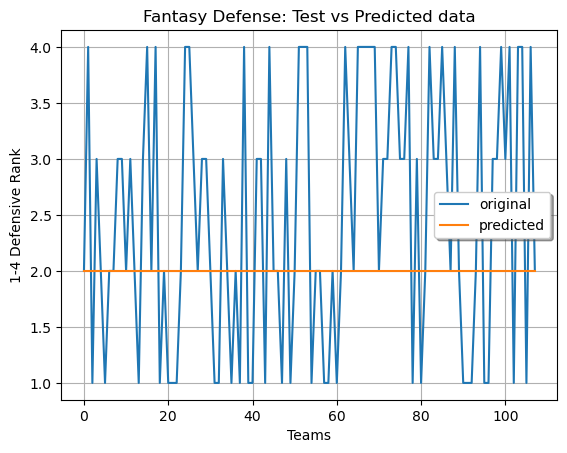

In [67]:
lrModel = lr.fit(train2_data)

lrPred = lrModel.transform(test2_data)

from pyspark.ml.evaluation import RegressionEvaluator

ev = RegressionEvaluator(predictionCol="prediction", labelCol="PPRDefRankSplits")
mse1 = ev.evaluate(lrPred, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)


x_ax = range(0, lrPred.count())
y_pred=lrPred.select("prediction").collect()
y_orig=lrPred.select("PPRDefRankSplits").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('1-4 Defensive Rank')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [68]:
### Results of Logistic Regression with Split Ranks on 2018 Validation Set

Mean Squared Error: 1.4999999999999998


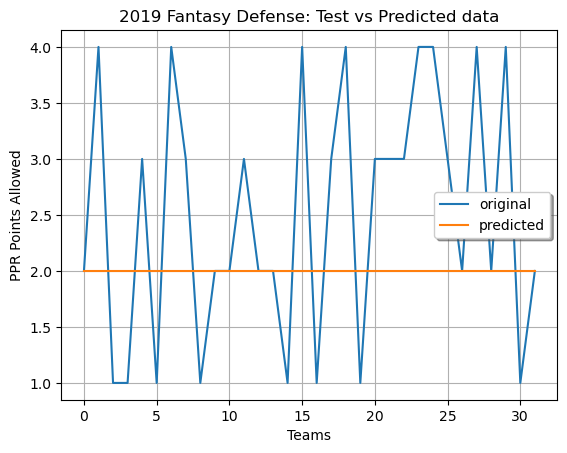

+--------------------+----------+----------------+
|                  Tm|prediction|PPRDefRankSplits|
+--------------------+----------+----------------+
|   Arizona Cardinals|       2.0|               2|
|     Atlanta Falcons|       2.0|               4|
|    Baltimore Ravens|       2.0|               1|
|       Buffalo Bills|       2.0|               1|
|   Carolina Panthers|       2.0|               3|
|       Chicago Bears|       2.0|               1|
|  Cincinnati Bengals|       2.0|               4|
|    Cleveland Browns|       2.0|               3|
|      Dallas Cowboys|       2.0|               1|
|      Denver Broncos|       2.0|               2|
|       Detroit Lions|       2.0|               2|
|   Green Bay Packers|       2.0|               3|
|      Houston Texans|       2.0|               2|
|  Indianapolis Colts|       2.0|               2|
|Jacksonville Jaguars|       2.0|               1|
|  Kansas City Chiefs|       2.0|               4|
|Los Angeles Chargers|       2.

In [69]:
lrPred19 = lrModel.transform(dfsplit19)

ev = RegressionEvaluator(predictionCol="prediction", labelCol="PPRDefRankSplits")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("PPRDefRankSplits").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Points Allowed')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction',"PPRDefRankSplits").show(32)

### Random Forest Regression on Split Ranks

+-----------------+----------------+----------+
|               Tm|PPRDefRankSplits|prediction|
+-----------------+----------------+----------+
|Arizona Cardinals|               2|       1.0|
|Arizona Cardinals|               4|       3.0|
|Arizona Cardinals|               1|       2.0|
|  Atlanta Falcons|               3|       2.0|
|  Atlanta Falcons|               2|       2.0|
+-----------------+----------------+----------+
only showing top 5 rows



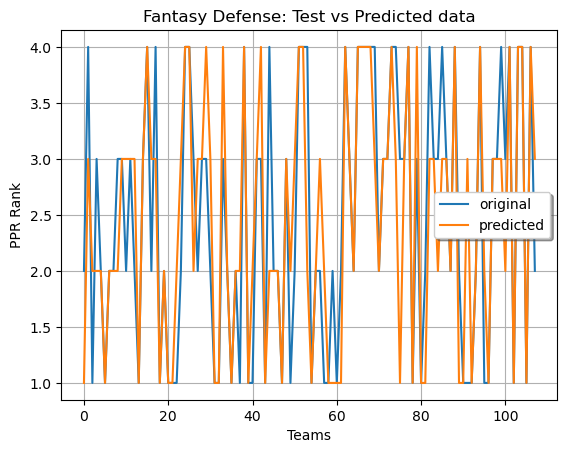

In [70]:

# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="PPRDefRankSplits", featuresCol="scaledFeatures", numTrees=10)

# Chain indexers and forest in a Pipeline
pipeline = Pipeline(stages=[rf])

# Train model.  This also runs the indexers.
model = pipeline.fit(train2_data)

# Make predictions.
predictions = model.transform(test2_data)

# Select example rows to display.
predictions.select('Tm', "PPRDefRankSplits", "prediction").show(5)

# Select (prediction, true label) and compute test error
#evaluator = MulticlassClassificationEvaluator(labelCol="Next_PPRDefRank", predictionCol="prediction", metricName="accuracy")
#acc = evaluator.evaluate(predictions)
#print("Test Error =" % acc)

x_ax = range(0, predictions.count())
y_pred=predictions.select("prediction").collect()
y_orig=predictions.select("PPRDefRankSplits").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Rank')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [71]:
ev = RegressionEvaluator(predictionCol="prediction", labelCol="Next_PPRDefRank")
mse1 = ev.evaluate(predictions, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

Mean Squared Error: 275.65740740740745


### Results of Random Forest Regression with Split Ranks on 2018 Validation Set

Mean Squared Error: 1.8750000000000002


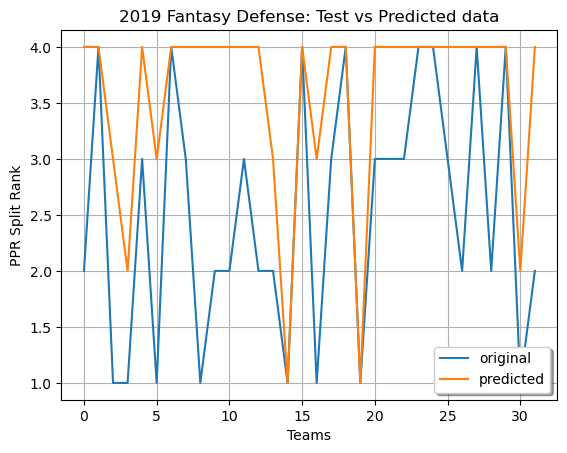

+--------------------+----------+----------------+
|                  Tm|prediction|PPRDefRankSplits|
+--------------------+----------+----------------+
|Jacksonville Jaguars|       1.0|               1|
|   Minnesota Vikings|       1.0|               1|
|       Buffalo Bills|       2.0|               1|
|    Tennessee Titans|       2.0|               1|
|Los Angeles Chargers|       3.0|               1|
|    Baltimore Ravens|       3.0|               1|
|       Chicago Bears|       3.0|               1|
|  Indianapolis Colts|       3.0|               2|
|   Arizona Cardinals|       4.0|               2|
|     Atlanta Falcons|       4.0|               4|
|  Cincinnati Bengals|       4.0|               4|
|       Detroit Lions|       4.0|               2|
|   Carolina Panthers|       4.0|               3|
|    Cleveland Browns|       4.0|               3|
|      Dallas Cowboys|       4.0|               1|
|   Green Bay Packers|       4.0|               3|
|      Houston Texans|       4.

In [72]:
lrPred19 = model.transform(dfsplit19)

ev = RegressionEvaluator(predictionCol="prediction", labelCol="PPRDefRankSplits")
mse1 = ev.evaluate(lrPred19, {ev.metricName: "mse"})
print("Mean Squared Error:", mse1)

x_ax = range(0, lrPred19.count())
y_pred=lrPred19.select("prediction").collect()
y_orig=lrPred19.select("PPRDefRankSplits").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("2019 Fantasy Defense: Test vs Predicted data")
plt.xlabel('Teams')
plt.ylabel('PPR Split Rank')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

lrPred19.sort('prediction').select('Tm','prediction',"PPRDefRankSplits").show(32)